In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [5, None, None, 8],
})

df.isnull().sum()

A    1
B    2
dtype: int64

In [3]:
titanic_df = sns.load_dataset('titanic')

In [4]:
# titanic_df.head()
print(titanic_df.shape)
# print(titanic_df.isnull())
# print(titanic_df.isna())
# print(titanic_df.notnull())
# print(titanic_df.notna())

(891, 15)


In [5]:
# titanic_df.isnull().sum()
# titanic_df.shape

In [6]:
# titanic_df = titanic_df.dropna()

In [7]:
# titanic_df.shape

In [8]:
# titanic_df = titanic_df.dropna(how='all')
# print(titanic_df.shape)

In [60]:
integer_list = np.random.randint(-500, 1000, size = 100)
outliers = np.array([111110, -25500, -999999])
integer_list = np.concatenate((integer_list, outliers), axis = None)
integer_list

array([   -478,    -168,     276,    -247,     140,     614,    -269,
          -375,     928,     173,     928,    -316,      95,     715,
           164,      40,     736,     894,    -374,    -275,     714,
          -469,     167,     566,     238,    -321,     768,    -129,
           221,     607,     689,     965,      57,     733,    -403,
           212,    -204,    -207,    -467,     570,     734,    -288,
           106,    -131,     686,    -146,     290,     342,    -321,
           912,    -415,    -302,     751,     221,     546,     653,
           -93,     645,      18,     450,     510,    -134,    -105,
          -308,    -100,     155,    -170,     972,     643,     -68,
             5,    -163,     296,    -379,       7,     423,    -141,
           958,     143,    -341,    -141,    -226,     472,     207,
          -407,     100,    -421,     621,    -347,    -469,    -476,
          -129,     463,    -130,    -307,     303,    -481,     825,
           172,     

In [61]:
from scipy.stats import zscore

In [62]:
z_scores = zscore(integer_list)
outliers = np.where(np.abs(z_scores) > 3)

In [63]:
integer_list[outliers]

array([-999999])

In [64]:
Q1 = np.percentile(integer_list, 25)
Q3 = np.percentile(integer_list, 75)
IQR = Q3 - Q1


In [65]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q1 + 1.5 * IQR
print(lower_fence)
print(upper_fence)

-1479.0
963.0


In [66]:
outliers = integer_list[(integer_list < lower_fence) | (integer_list > upper_fence)]
outliers

array([    965,     972,  111110,  -25500, -999999])

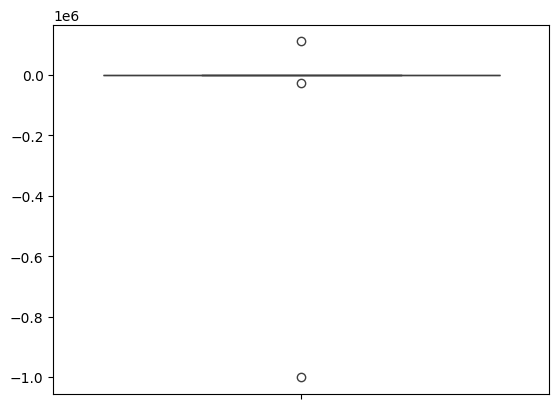

In [67]:
import matplotlib.pyplot as plt
sns.boxplot(integer_list)
plt.show()

In [71]:
# integer_list = integer_list[(integer_list >= lower_fence) & (integer_list <= upper_fence)]
integer_list

array([   -478,    -168,     276,    -247,     140,     614,    -269,
          -375,     928,     173,     928,    -316,      95,     715,
           164,      40,     736,     894,    -374,    -275,     714,
          -469,     167,     566,     238,    -321,     768,    -129,
           221,     607,     689,     965,      57,     733,    -403,
           212,    -204,    -207,    -467,     570,     734,    -288,
           106,    -131,     686,    -146,     290,     342,    -321,
           912,    -415,    -302,     751,     221,     546,     653,
           -93,     645,      18,     450,     510,    -134,    -105,
          -308,    -100,     155,    -170,     972,     643,     -68,
             5,    -163,     296,    -379,       7,     423,    -141,
           958,     143,    -341,    -141,    -226,     472,     207,
          -407,     100,    -421,     621,    -347,    -469,    -476,
          -129,     463,    -130,    -307,     303,    -481,     825,
           172,     

In [72]:
capped_data = np.where(integer_list < lower_fence, lower_fence, integer_list)
capped_data = np.where(capped_data > upper_fence, upper_fence, capped_data)
print(capped_data)

[ -478.  -168.   276.  -247.   140.   614.  -269.  -375.   928.   173.
   928.  -316.    95.   715.   164.    40.   736.   894.  -374.  -275.
   714.  -469.   167.   566.   238.  -321.   768.  -129.   221.   607.
   689.   963.    57.   733.  -403.   212.  -204.  -207.  -467.   570.
   734.  -288.   106.  -131.   686.  -146.   290.   342.  -321.   912.
  -415.  -302.   751.   221.   546.   653.   -93.   645.    18.   450.
   510.  -134.  -105.  -308.  -100.   155.  -170.   963.   643.   -68.
     5.  -163.   296.  -379.     7.   423.  -141.   958.   143.  -341.
  -141.  -226.   472.   207.  -407.   100.  -421.   621.  -347.  -469.
  -476.  -129.   463.  -130.  -307.   303.  -481.   825.   172.   -64.
   963. -1479. -1479.]
